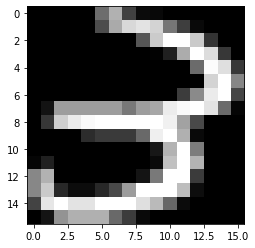

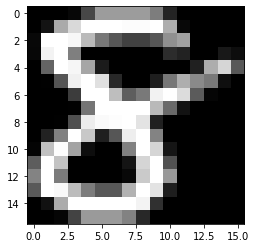

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
three_data=np.loadtxt('three.txt')
three=three_data[0].reshape((16,16)).T
plt.imshow(three,cmap='gray')
plt.show()

eight_data=np.loadtxt('eight.txt')
eight=eight_data[0].reshape((16,16)).T
plt.imshow(eight,cmap='gray')
plt.show()

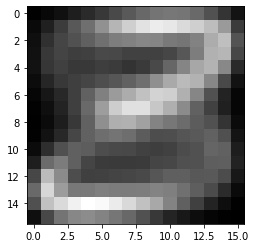

In [ ]:
X=np.concatenate((three_data, eight_data), axis=0)
y=np.mean(X,axis=0)
y2=y.reshape((16,16)).T
plt.imshow(y2,cmap='gray')
plt.show()

In [ ]:
X2=X-y
n=400
S=np.matmul(X2.T,X2)/(n-1)
S[0:4,0:4]

array([[  59.16729323,  142.14943609,   28.68201754,   -7.17857143],
       [ 142.14943609,  878.93879073,  374.13731203,   24.12778195],
       [  28.68201754,  374.13731203, 1082.9058584 ,  555.2268797 ],
       [  -7.17857143,   24.12778195,  555.2268797 , 1181.24408521]])

237155.24629048567 145188.35268682562


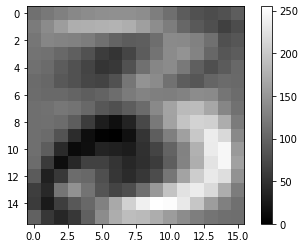

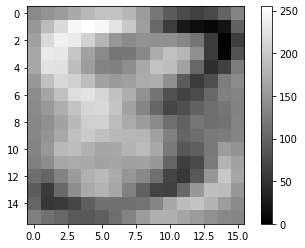

In [ ]:
from numpy.linalg import eig
values, vectors = eig(S)
sorted_values=np.sort(values)
index_values=np.argsort(values)
sorted_values=sorted_values[::-1]
index_values=index_values[::-1]
print(sorted_values[0],sorted_values[1])


v1=vectors[:,index_values[0]]
v2=vectors[:,index_values[1]]
v1_norm=(v1-min(v1))/(max(v1)-min(v1))*255
v2_norm=(v2-min(v2))/(max(v2)-min(v2))*255
plt.imshow(v1_norm.reshape((16,16)).T,cmap='gray')
plt.colorbar()
plt.show()

plt.imshow(v2_norm.reshape((16,16)).T,cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
V=np.stack([v1,v2],axis=1)
projection=X@V
print(projection[0,:],projection[200,:])


[ 240.89894248 -297.4864024 ] [-207.99681327  594.71553874]


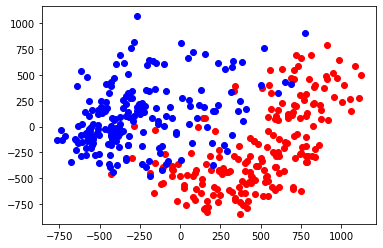

In [ ]:
plt.scatter(projection[0:200,0],projection[0:200,1],c='red')
plt.scatter(projection[200:400,0],projection[200:400,1],c='blue')
plt.show()